# Machine Learning Homework 1

## Instructions

This homework is due **before class on Friday, March 7.**

Important notes:
- Please submit the notebook with the output.
- If the answer is not obvious from the printout, please type it.
- The notebook should be self contained and we should be able to rerun it.
- Import all the libraries that you find necessary to answer the questions.
- If the subquestion is worth 1 point, no half points will be given: full point will be given for the correct answer. Similarly, if the question is worth 2, possible points are 0,1,2.
- Acknowledge the use of outside sources and code assistants.

## Question 1 

**Total 20 points**


Import the California house prices dataset from `sklearn.datasets` using `fetch_california_housing` as follows:</br>
    `from sklearn.datasets import fetch_california_housing` <br>
     `housing = fetch_california_housing()`
1. Print out the dataset description and read it (1pt)
2. Convert the dataset to pandas dataframe (all the features and the target) (1pt)
3. Check the number of data points, data types, and print the first 15 lines of the dataset (1pt)
4. Check the number of missing values per feature (1pt)
5. Divide the dataset into train and test, where 30% of the dataset will be used for test, with the `random_state=42` (1pt)
6. Train a Linear Regression model (1pt)
7. What value of target is predicted by the model, when all the features have value 0 (1pt)
8. What is the value of the coefficient associated with the feature HouseAge (1pt)
9. Predict the target values of the data points from the training set (1pt)
10. What is the value of the cost function for the obtained coefficients and the training dataset (1pt)
11. Evaluate the model's performance (1pt)
12. Generate polynomial features up to degree 2 of the training dataset (1pt)
13. Scale the polynomial features from the previous step using the standard scaler (1pt)
14. Train a Ridge regression model with the regularization strength equal to 0.001 on the scaled dataset.  What would happen to the feature coefficients and the model if alpha approached infinity?  (2pt)
15. Train Lasso Regression with the regularization strength equal to 0.01 on the scaled dataset and set the maximum number of iterations to 100000 (1pt)
16. Count how many coefficients (excluding intercept) are calculated (1pt)
17. Check how many features will not be used to predict the target with this model (1pt)
18. Plot the coefficients of Lasso and Ridge regression on the same plot, with label, Ridge in red, and Lasso in blue (2pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### 1.1. Print out the dataset description and read it (1pt)

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### 1.2. Convert the dataset to pandas dataframe (all the features and the target) (1pt)

In [4]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing.target
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

### 1.3. Check the number of samples, the data types and print the first 15 lines of the dataset (1pt)

In [5]:
df.shape[0]

#or
#df.info()

20640

In [6]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [7]:
df.head(15)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5   4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6   3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7   3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8   2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9   3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10  3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11  3.2705      52.0  4.772480   1.024523      1504.0  2.049046     37.85   
12  3.0750      52.0  5.322650   1.012821      1098.0  2.346154     37.85   
13  2.6736      52.0  4.000000   1.097701       345.0  1.982759     37.84   
14  1.9167      52.0  4.262903   1.009677      1212.0  1.954839     37.85   

    Longitude  target  
0     -122.23   4.526  
1     -122.22   3.585  
2     -122.24   3.521  
3     -122.25   3.413  
4     -122.25   3.422  
5     -122.25   2.697  
6     -122.25   2.992  
7     -122.25   2.414  
8     -122.26   2.267  
9     -122.25   2.611  
10    -122.26   2.815  
11    -122.26   2.418  
12    -122.26   2.135  
13    -122.26   1.913  
14    -122.26   1.592

### 1.4. Check the number of missing values per feature (1pt)

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

### 1.5. Divide the dataset into train and test, where 30% of the dataset will be used for test, with the random_state=42 (1pt)

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

or

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42, test_size=0.3)

or

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=42, test_size=0.3)

### 1.6. Train a Linear Regression model (1pt)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### 1.7. What value of target is predicted by the model, when all the features have value 0 (1pt)

In [13]:
lin_reg.intercept_

np.float64(-37.056241331525186)

### 1.8. What is the value of the coefficient associated with the feature HouseAge? (1pt)

In [14]:
df.columns
#df.columns.get_loc('HouseAge')

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [15]:
lin_reg.coef_[1]

np.float64(0.009681867985916507)

### 1.9. Predict the target values of the data points from the training set (1pt)

In [16]:
y_train_pred = lin_reg.predict(X_train)

In [17]:
X_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7061   4.1312      35.0  5.882353   0.975490      1218.0  2.985294     33.93   
14689  2.8631      20.0  4.401210   1.076613       999.0  2.014113     32.79   
17323  4.2026      24.0  5.617544   0.989474       731.0  2.564912     34.59   
10056  3.1094      14.0  5.869565   1.094203       302.0  2.188406     39.26   
15750  3.3068      52.0  4.801205   1.066265      1526.0  2.298193     37.77   
...       ...       ...       ...        ...         ...       ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Longitude  
7061     -118.02  
14689    -117.09  
17323    -120.14  
10056    -121.00  
15750    -122.45  
...          ...  
11284    -117.96  
11964    -117.43  
5390     -118.38  
860      -121.96  
15795    -122.42  

[14448 rows x 8 columns]

In [18]:
y_train_pred

array([2.13761366, 1.76385736, 2.75114302, ..., 2.03900584, 2.84130506,
       2.27916759], shape=(14448,))

### 1.10. What is the value of the cost function for the obtained coefficients and the training dataset (1pt)

In [19]:
SSE = ((y_train-y_train_pred)**2).sum()
SSE 

np.float64(7561.471021289252)

In [20]:
MSE = ((y_train-y_train_pred)**2).sum()/len(y_train)
MSE 

np.float64(0.5233576288267755)

or

In [21]:
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(y_train,y_train_pred)
error_train

0.5233576288267755

### 1.11. Evaluate the model's performance (1pt)

In [22]:
lin_reg.score(X_test,y_test) 

0.5957702326061662

### 1.12. Generate polynomial features up to degree 2 of the training set (1pt) 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias = False)
poly_converter.fit(X_train)

X_train = poly_converter.transform(X_train)

### 1.13. Scale the polynomial features from the previous step using the standard scaler (1pt)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

### 1.14. Train a Ridge Regression with the regularization strength equal to 0.001 on the scaled dataset. What would happen to the feature coefficients and the model if alpha approached infinity? (2pt)

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

The feature coefficients would shrink toward 0, culminating in the model being underfit as the high penalty would prevent it from properly capturing the relationships between the input features and the target. 

### 1.15. Train Lasso Regression with the regularization strength equal to 0.01 on the scaled dataset and set the maximum number of iterations to 100000 (1pt)

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1e-2, max_iter = int(1e5))
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=100000)

### 1.16. Count how many coefficients (excluding intercept) are calculated (1pt)

In [27]:
print(f"Total number of coefficients: {len(lasso.coef_)}") 

Total number of coefficients: 44


### 1.17. Check how many features will not be used to predict the target with this model (1pt)

In [28]:
print(f"Number of Features with Coefficients equal to 0: {(lasso.coef_==0).sum()}")

Number of Features with Coefficients equal to 0: 28


### 1.18. Plot the coefficients of Lasso and Ridge regression on the same plot, with label, Ridge in red, and Lasso in blue (2pt)

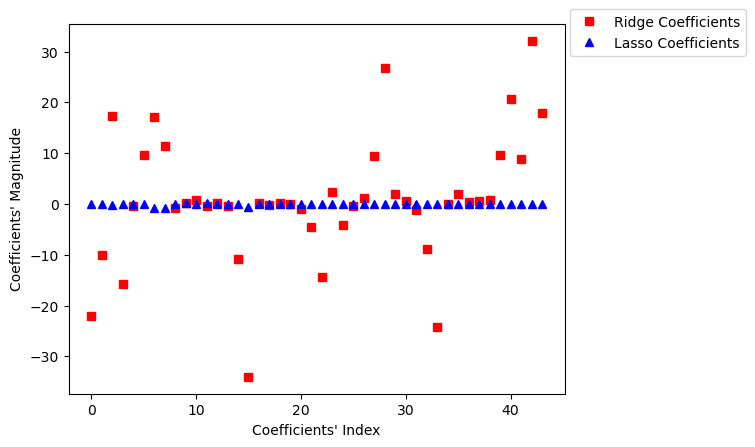

In [29]:
#plt.figure(figsize=(5,4))
plt.plot(ridge.coef_, 's', label = 'Ridge Coefficients', color = 'red')
plt.plot(lasso.coef_, '^', label = 'Lasso Coefficients', color = 'blue')
plt.xlabel("Coefficients' Index")
plt.ylabel("Coefficients' Magnitude")
plt.legend(loc=(1.01,0.915));

## Question 2

**Total 18 points**

For this question we will use a dataset with the medical details of patients for predicting the onset of diabetes within 5 years. The target is the last column of the dataset,  where value 1 is interpreted as "tested positive for diabetes".
 1. Import the csv file "diabetes.csv" into pandas dataframe (1pt)
 2. How many duplicate rows do we have? If there are any, remove them. (1pt)
 3. Generate descriptive statistics for all the numerical columns with one line of code  (1pt)
 4. Plot the distribution of the target value, per class percentages (1pt)
 5. Split the dataset into training, validation and test set, with the ratio 50:30:20, and use the `random_seed=42` (1pt)
 6. Train the logistic regression with solver='liblinear' with regularization strength equal to 0.01 with lasso regularization and that stops converging after 700 iterations (2pt) 
 7. Use the validation set to find the value of the threshold that maximizes f1 score (of Class 1). What is that threshold value? (1pt)
 8. If we use the threshold value found above, how many false negatives do we have on the test dataset? (1pt)
 9. What is the precision of our model with the value of threshold from step 7? (1pt)
 10. What proportion (approximately) of patients with diabetes would we reach if we decided to contact 60% of the patients in the test set, ordered by the decreasing model score (1pt)
 11. Use the data available (except the test set) with a cross validation method that finds the value of regularization strength of l1 penalty of Logistic regression that maximizes recall. Check at least 8 different values of the parameter and verify the best cross validation score (4pt)
 12. What value of C gives the highest recall (1pt)
 13. What was the second best mean test value of recall in cross validation (1pt)
 14. What is f1 score of the best model (1pt)


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Import the csv file "diabetes.csv" into pandas dataframe (1pt)

In [31]:
df = pd.read_csv('diabetes.csv')

### 2.2. How many duplicate rows do we have? If there are any, remove them. (1pt)

In [32]:
print(len(df))
print(f"Number of duplicate rows: {df.duplicated().sum()}")

df.drop_duplicates(keep = 'first', inplace=True)
print(len(df))

771
Number of duplicate rows: 3
768


### 2.3. Generate descriptive statistics for all the numerical columns with one line of code (1pt)

In [33]:
df.describe()

num_pregnancy  glucose_conc  blood_pressure   skin_fold       serum  \
count     768.000000    768.000000      768.000000  768.000000  768.000000   
mean        3.845052    120.894531       69.105469   20.536458   79.799479   
std         3.369578     31.972618       19.355807   15.952218  115.244002   
min         0.000000      0.000000        0.000000    0.000000    0.000000   
25%         1.000000     99.000000       62.000000    0.000000    0.000000   
50%         3.000000    117.000000       72.000000   23.000000   30.500000   
75%         6.000000    140.250000       80.000000   32.000000  127.250000   
max        17.000000    199.000000      122.000000   99.000000  846.000000   

        body_mass  diabetes_pedigree         age      target  
count  768.000000         768.000000  768.000000  768.000000  
mean    31.992578           0.471876   33.240885    0.348958  
std      7.884160           0.331329   11.760232    0.476951  
min      0.000000           0.078000   21.000000    0.000000  
25%     27.300000           0.243750   24.000000    0.000000  
50%     32.000000           0.372500   29.000000    0.000000  
75%     36.600000           0.626250   41.000000    1.000000  
max     67.100000           2.420000   81.000000    1.000000

### 2.4. Plot the distribution of the target value, per class percentages (1pt)

target
0    500
1    268
Name: count, dtype: int64


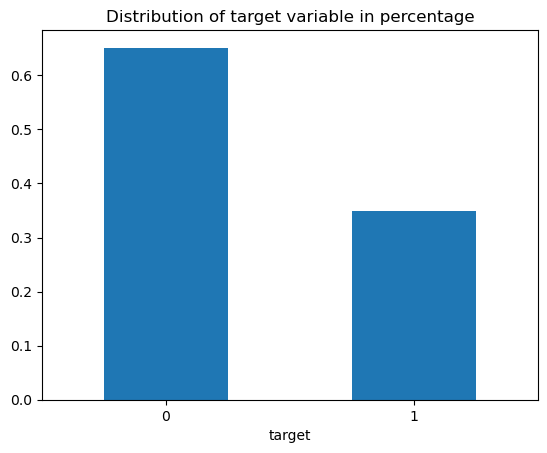

In [34]:
print(df['target'].value_counts())
#alternative: unique, counts = np.unique(df['target'], return_counts=True)

df['target'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distribution of target variable in percentage')
plt.show()

#Alternative code to display plot
#sns.barplot(x = df['target'].value_counts().index, 
#y = df['target'].value_counts(normalize=True)).set(title = 'Distribution of target variable (in percentage)');

### 2.5. Split the dataset into training, validation and test set, with the ratio 50:30:20, and use the random_seed=42 (1pt)

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.375, random_state = 42) #30/(100-20)

#to confirm

print(round(len(X_train)/len(X),2))
print(round(len(X_val)/len(X),2))
print(round(len(X_test)/len(X),2))

0.5
0.3
0.2


### 2.6. Train the logistic regression with solver='liblinear' with regularization strength equal to 0.01 with lasso regularization and that stops converging after 700 iterations (2pt) 

In [36]:
#Standardization could be performed but it was not required. 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear', C = (1/0.01), penalty = 'l1', max_iter = 700)
log_reg.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=700, penalty='l1', solver='liblinear')

### 2.7. Use the validation set to find the value of the threshold that maximizes f1 score (of Class 1). What is that threshold value? (1pt)

In [37]:
from sklearn.metrics import precision_recall_curve
y_pred_proba_val= log_reg.predict_proba(X_val)
precision, recall, threshold = precision_recall_curve(y_val, y_pred_proba_val[:,1])

In [38]:
import numpy as np
f1_scores = 2*recall*precision/(recall+precision)
idx_best=np.nanargmax(f1_scores)
best_threshold=threshold[idx_best]
print('Best threshold: ', best_threshold)

Best threshold:  0.2626832463017761


### 2.8. If we use the threshold value found above, how many false negatives do we have on the test dataset? (1pt)

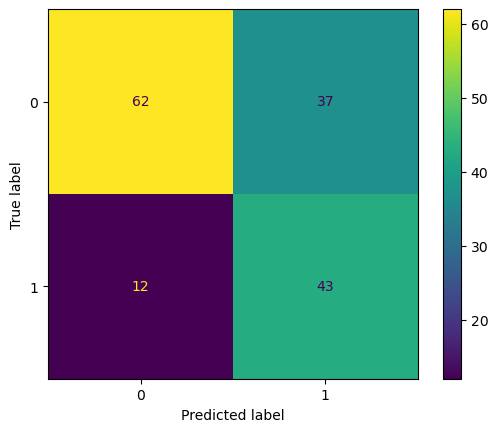

In [39]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
y_pred_proba_test= log_reg.predict_proba(X_test)
y_pred_new = (y_pred_proba_test[:,1] >= best_threshold).astype(int)
cm=confusion_matrix(y_test, y_pred_new)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot();

In [40]:
print(f"False negatives: {cm[1][0]}")

False negatives: 12


### 2.9. What is the precision of our model with the value of threshold from step 7? (1pt)

In [41]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_new)

0.5375

### 2.10. What proportion (approximately) of patients with diabetes would we reach if we decided to contact 60% of the patients in the test set, ordered by the decreasing model score (1pt)

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

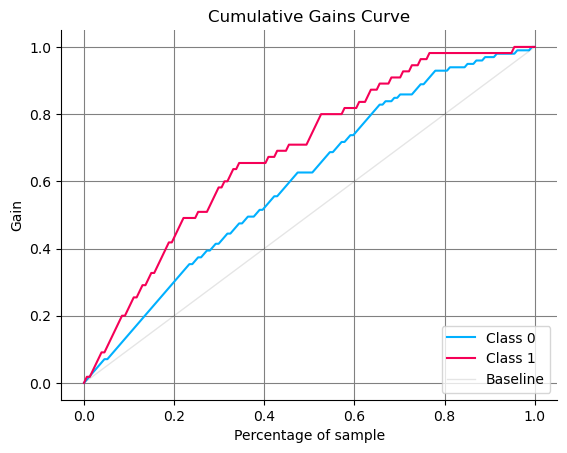

In [42]:
from sklearn_evaluation.plot import cumulative_gain
cumulative_gain(y_test, y_pred_proba_test)

In [43]:
print("If we decided to contact 60% of the patients in the test set, we would reach approximately 80% of the patients with diabetes.")

If we decided to contact 60% of the patients in the test set, we would reach approximately 80% of the patients with diabetes.


### 2.11. Use the data available (except the test set) with a cross validation method that finds the value of regularization strength of l1 penalty of Logistic regression that maximizes recall. Check at least 8 different values of the parameter and verify the best cross validation score (4pt)

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
np.arange(0.002, 0.22, 0.03)

array([0.002, 0.032, 0.062, 0.092, 0.122, 0.152, 0.182, 0.212])

In [46]:
param_grid = {'C': np.arange(0.002, 0.22, 0.03)}

grid_search = GridSearchCV(LogisticRegression(solver="liblinear", penalty='l1'), param_grid, scoring='recall')

In [47]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([0.002, 0.032, 0.062, 0.092, 0.122, 0.152, 0.182, 0.212])},
             scoring='recall')

In [48]:
grid_search.best_score_

np.float64(0.5260243632336655)

or

In [49]:
from scipy.stats import uniform
distributions= dict(C=uniform(loc=0, scale=4))
random_search = RandomizedSearchCV(LogisticRegression(solver="liblinear", penalty='l1'), distributions, scoring='recall', n_iter=8)
random_search.fit(X_trainval, y_trainval)


RandomizedSearchCV(estimator=LogisticRegression(penalty='l1',
                                                solver='liblinear'),
                   n_iter=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013BEF7757F0>},
                   scoring='recall')

In [50]:
random_search.best_score_

np.float64(0.5685492801771871)

### 2.12. What value of C gives the highest recall (1pt)

In [51]:
grid_search.best_params_

{'C': np.float64(0.182)}

In [52]:
random_search.best_params_

{'C': np.float64(3.575115902312705)}

or

In [53]:
results_grid = pd.DataFrame(grid_search.cv_results_)
results_random = pd.DataFrame(random_search.cv_results_)
print(results_grid[results_grid['mean_test_score'] == results_grid['mean_test_score'].max()]['param_C'].reset_index(drop=True)[0])
print(results_random[results_random['mean_test_score'] == results_random['mean_test_score'].max()]['param_C'].reset_index(drop=True)[0])

0.182
3.575115902312705


### 2.13. What was the second best mean test value of recall in cross validation (1pt)

In [54]:
results = pd.DataFrame(grid_search.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.008888      0.001085         0.011184        0.003361    0.002   
1       0.012031      0.002145         0.014828        0.003478    0.032   
2       0.015079      0.001570         0.013893        0.001386    0.062   
3       0.017014      0.002564         0.013607        0.001033    0.092   
4       0.016418      0.002078         0.011736        0.002120    0.122   
5       0.018939      0.002137         0.012201        0.001350    0.152   
6       0.020671      0.004331         0.013239        0.000900    0.182   
7       0.019981      0.001429         0.012767        0.000919    0.212   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.002}           0.142857           0.139535           0.023256   
1  {'C': 0.032}           0.357143           0.255814           0.116279   
2  {'C': 0.062}           0.380952           0.302326           0.255814   
3  {'C': 0.092}           0.476190           0.488372           0.372093   
4  {'C': 0.122}           0.547619           0.511628           0.395349   
5  {'C': 0.152}           0.619048           0.581395           0.465116   
6  {'C': 0.182}           0.595238           0.604651           0.488372   
7  {'C': 0.212}           0.571429           0.604651           0.488372   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.046512           0.095238         0.089480        0.048207   
1           0.255814           0.309524         0.258915        0.080715   
2           0.279070           0.404762         0.324585        0.058142   
3           0.372093           0.476190         0.436988        0.053173   
4           0.418605           0.476190         0.469878        0.056586   
5           0.441860           0.500000         0.521484        0.067951   
6           0.441860           0.500000         0.526024        0.063484   
7           0.441860           0.500000         0.521262        0.058837   

   rank_test_score  
0                8  
1                7  
2                6  
3                5  
4                4  
5                2  
6                1  
7                3

In [55]:
results[results.rank_test_score==2].mean_test_score

5    0.521484
Name: mean_test_score, dtype: float64

### 2.14. What is f1 score of the best model (1pt)

In [56]:
from sklearn.metrics import f1_score

In [57]:
y_pred=grid_search.best_estimator_.predict(X_test)

In [58]:
print('F1 score is', f1_score(y_test, y_pred))

F1 score is 0.6415094339622641


In [59]:
#grid_search.score(X_test,y_test) this yields a different result because the score employed as recall.